<a href="https://colab.research.google.com/github/vishnuchandramc/ML_DL_project_final/blob/master/LSTM_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!git clone https://github.com/vishnuchandramc/ML_DL_project_final.git

fatal: destination path 'ML_DL_project_final' already exists and is not an empty directory.


In [77]:
!ls

ML_DL_project_final  sample_data


In [78]:
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import glob
import os

In [79]:
data = pd.read_csv('ML_DL_project_final/PROCESSED/Aggregate_Expenditure.csv', index_col='State')
data.head()

,1980-81,1981-82,1982-83,1983-84,1984-85,1985-86,1986-87,1987-88,1988-89,1989-90,1990-91,1991-92,1992-93,1993-94,1994-95,1995-96,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,1610.0,1831.0,1933.0,2588.0,3119.0,3413.0,4068.0,4294.0,5223.0,5768.0,6581.0,7758.0,8984.0,10541.0,12459.0,14301.0,16265.0,17745.0,21958.0,22767.0,28119.0,31074.0,34373.0,40120.0,47153.0,48306.0,56648.0,74875.0,80803.89,85074.79,100635.64,115881.55,129440.92,136629.27,111067.46,112048.99,NaN
Arunachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,251.0,348.0,326.0,392.0,398.0,443.0,503.0,575.0,691.0,803.0,891.0,972.0,1004.0,1098.0,1206.0,1381.0,1363.0,2192.0,2085.0,2437.0,2786.0,3068.0,4272.59,5236.62,5579.12,6665.17,6353.56,7781.63,11482.51,12712.91,NaN
Assam,758.0,618.0,691.0,942.0,1165.0,1207.0,1586.0,1794.0,1855.0,2266.0,2689.0,2763.0,3136.0,3620.0,3998.0,4390.0,4267.0,5022.0,5204.0,7086.0,7631.0,8550.0,8936.0,10596.0,14745.0,12088.0,13485.0,15150.0,17485.86,24968.30,25946.97,30268.93,33747.64,37178.40,64979.96,63602.17,NaN
Bihar,1791.0,1871.0,1940.0,2144.0,2408.0,2966.0,3360.0,3914.0,4324.0,5219.0,6217.0,6805.0,7743.0,8433.0,8555.0,9417.0,9407.0,10216.0,12171.0,19548.0,16946.0,14869.0,17752.0,19134.0,20055.0,22568.0,27136.0,31573.0,37181.25,42796.03,50704.52,60180.03,69206.57,80405.17,132186.89,120685.32,NaN
Chhattisgarh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917.0,5624.0,6822.0,8951.0,9647.0,9725.0,11991.0,15029.0,17713.97,21558.72,23564.68,28720.69,34819.25,39441.94,55979.35,65810.70,NaN


In [80]:
data.iloc[0, :].head()

1980-81    1610.0
1981-82    1831.0
1982-83    1933.0
1983-84    2588.0
1984-85    3119.0
Name: Andhra Pradesh , dtype: float64

In [81]:
data.iloc[0, :].values

array([  1610.  ,   1831.  ,   1933.  ,   2588.  ,   3119.  ,   3413.  ,
         4068.  ,   4294.  ,   5223.  ,   5768.  ,   6581.  ,   7758.  ,
         8984.  ,  10541.  ,  12459.  ,  14301.  ,  16265.  ,  17745.  ,
        21958.  ,  22767.  ,  28119.  ,  31074.  ,  34373.  ,  40120.  ,
        47153.  ,  48306.  ,  56648.  ,  74875.  ,  80803.89,  85074.79,
       100635.64, 115881.55, 129440.92, 136629.27, 111067.46, 112048.99,
             nan])

In [82]:
years = data.columns.values[1:]
years = list(map(lambda str: str.split('-')[0], years))

In [83]:
years=pd.to_datetime(years, format='%Y')

In [84]:
frame = pd.DataFrame({'year':years, 'Aggregate_Expenditure':data.iloc[0, :].values[1:]}, index=years)

In [85]:
frame.dropna(inplace=True)
frame['Aggregate_Expenditure']

1981-01-01      1831.00
1982-01-01      1933.00
1983-01-01      2588.00
1984-01-01      3119.00
1985-01-01      3413.00
1986-01-01      4068.00
1987-01-01      4294.00
1988-01-01      5223.00
1989-01-01      5768.00
1990-01-01      6581.00
1991-01-01      7758.00
1992-01-01      8984.00
1993-01-01     10541.00
1994-01-01     12459.00
1995-01-01     14301.00
1996-01-01     16265.00
1997-01-01     17745.00
1998-01-01     21958.00
1999-01-01     22767.00
2000-01-01     28119.00
2001-01-01     31074.00
2002-01-01     34373.00
2003-01-01     40120.00
2004-01-01     47153.00
2005-01-01     48306.00
2006-01-01     56648.00
2007-01-01     74875.00
2008-01-01     80803.89
2009-01-01     85074.79
2010-01-01    100635.64
2011-01-01    115881.55
2012-01-01    129440.92
2013-01-01    136629.27
2014-01-01    111067.46
2015-01-01    112048.99
Name: Aggregate_Expenditure, dtype: float64

In [86]:
scaler = MinMaxScaler(feature_range=(0, 1))
frame = scaler.fit_transform(frame['Aggregate_Expenditure'].values.reshape(-1, 1))

In [87]:
train_size = int(len(frame) * 0.67)
test_size = len(frame) - train_size
train, test = frame[0:train_size,:], frame[train_size:len(frame),:]
print(len(train), len(test))

23 12


In [88]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [89]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [90]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [91]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
21/21 - 2s - loss: 0.0118
Epoch 2/100
21/21 - 0s - loss: 0.0093
Epoch 3/100
21/21 - 0s - loss: 0.0075
Epoch 4/100
21/21 - 0s - loss: 0.0070
Epoch 5/100
21/21 - 0s - loss: 0.0064
Epoch 6/100
21/21 - 0s - loss: 0.0062
Epoch 7/100
21/21 - 0s - loss: 0.0060
Epoch 8/100
21/21 - 0s - loss: 0.0059
Epoch 9/100
21/21 - 0s - loss: 0.0059
Epoch 10/100
21/21 - 0s - loss: 0.0058
Epoch 11/100
21/21 - 0s - loss: 0.0058
Epoch 12/100
21/21 - 0s - loss: 0.0057
Epoch 13/100
21/21 - 0s - loss: 0.0057
Epoch 14/100
21/21 - 0s - loss: 0.0056
Epoch 15/100
21/21 - 0s - loss: 0.0056
Epoch 16/100
21/21 - 0s - loss: 0.0055
Epoch 17/100
21/21 - 0s - loss: 0.0055
Epoch 18/100
21/21 - 0s - loss: 0.0054
Epoch 19/100
21/21 - 0s - loss: 0.0054
Epoch 20/100
21/21 - 0s - loss: 0.0053
Epoch 21/100
21/21 - 0s - loss: 0.0053
Epoch 22/100
21/21 - 0s - loss: 0.0053
Epoch 23/100
21/21 - 0s - loss: 0.0052
Epoch 24/100
21/21 - 0s - loss: 0.0052
Epoch 25/100
21/21 - 0s - loss: 0.0051
Epoch 26/100
21/21 - 0s - loss: 0.

In [92]:
trainY.shape

(21,)

In [93]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 913.44 RMSE
Test Score: 10263.73 RMSE


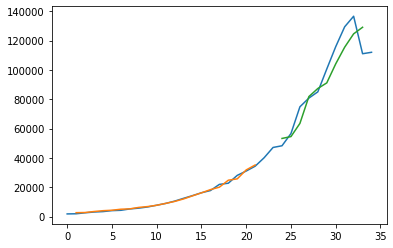

In [94]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(frame)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(frame)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(frame)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(frame))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [95]:
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print("Last Value:", np.asscalar(last_val))
print("Next Value:", np.asscalar(last_val*next_val))
# print np.append(last_val, next_val)

Last Value: 129113.265625
Next Value: 121914.2421875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """


In [96]:
files = glob.glob('ML_DL_project_final/PROCESSED/*.csv')

In [97]:
files = list(filter(lambda str: 'Nominal_GSDP_Series' not in str, files))
files

['ML_DL_project_final/PROCESSED/Interest_Payments.csv',
 'ML_DL_project_final/PROCESSED/Aggregate_Expenditure.csv',
 'ML_DL_project_final/PROCESSED/Outstanding_Liabilities.csv',
 'ML_DL_project_final/PROCESSED/Capital_Expenditure.csv',
 'ML_DL_project_final/PROCESSED/Revenue_Expenditure.csv',
 'ML_DL_project_final/PROCESSED/Capital_Receipts.csv',
 'ML_DL_project_final/PROCESSED/Fiscal_Deficits.csv',
 'ML_DL_project_final/PROCESSED/Aggregate_Receipts.csv',
 'ML_DL_project_final/PROCESSED/Revenue_Receipts.csv',
 'ML_DL_project_final/PROCESSED/Revenue_Deficits.csv',
 'ML_DL_project_final/PROCESSED/Social_Sector_Expenditure.csv',
 'ML_DL_project_final/PROCESSED/Own_Tax_Revenues.csv']

In [98]:
read_files = { os.path.splitext(os.path.basename(file_path))[0] : pd.read_csv(file_path, index_col='State') for file_path in files}

In [99]:
file_names = [os.path.splitext(os.path.basename(file_path))[0] for file_path in files]
file_names

['Interest_Payments',
 'Aggregate_Expenditure',
 'Outstanding_Liabilities',
 'Capital_Expenditure',
 'Revenue_Expenditure',
 'Capital_Receipts',
 'Fiscal_Deficits',
 'Aggregate_Receipts',
 'Revenue_Receipts',
 'Revenue_Deficits',
 'Social_Sector_Expenditure',
 'Own_Tax_Revenues']

In [100]:
states = read_files['Capital_Receipts'].index
states

Index(['Andhra Pradesh ', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'All States', 'Delhi',
       'Puducherry'],
      dtype='object', name='State')

In [101]:
frame = (read_files['Capital_Receipts'])

In [140]:
final_frame = pd.DataFrame(columns=file_names)
for idx, state in enumerate(states):
    state_data = []
    for feature, frame in read_files.items():
        years = list(map(lambda str: str.split('-')[0], frame.columns.values[1:]))
        years = pd.to_datetime(years, format='%Y')
        frame = pd.DataFrame({'Year':years, feature:frame.iloc[idx, :].values[1:]}, index=years)
        frame.dropna(inplace=True)
        try:
            #MinMax Scale
            scaler = MinMaxScaler(feature_range=(0, 1))
            frame = scaler.fit_transform(frame['Aggregate_Expenditure'].values.reshape(-1, 1))

            #train test
            train_size = int(len(frame) * 0.67)
            test_size = len(frame) - train_size
            train, test = frame[0:train_size,:], frame[train_size:len(frame),:]
            print(len(train), len(test))
        
            #creating dataset
            look_back = 1
            trainX, trainY = create_dataset(train, look_back)
            testX, testY = create_dataset(test, look_back)

            #reshaping
            trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
            testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

            #model
            model = Sequential()
            model.add(LSTM(4, input_shape=(1, look_back)))
            model.add(Dense(1))
            model.compile(loss='mean_squared_error', optimizer='adam')
            model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

            #prediction
            trainPredict = model.predict(trainX)
            testPredict = model.predict(testX)

            # invert predictions
            trainPredict = scaler.inverse_transform(trainPredict)
            trainY = scaler.inverse_transform([trainY])
            testPredict = scaler.inverse_transform(testPredict)
            testY = scaler.inverse_transform([testY])

            #prediction future
            last_val = testPredict[-1]
            last_val_scaled = last_val/last_val
            next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
            # print("Last Value:", np.asscalar(last_val))
            # print("Next Value:", np.asscalar(last_val*next_val))
            pred_val = np.asscalar(last_val*next_val)
        except:
            # print('State : {} Feature : {} Data : {}'.format(state, feature, frame[feature]))
            pass
        state_data.append(pred_val)
    # print('State : {}, Data : {}'.format(state, state_data))
    final_frame.loc[state] = state_data

23 12
Epoch 1/100
21/21 - 2s - loss: 0.0088
Epoch 2/100
21/21 - 0s - loss: 0.0064
Epoch 3/100
21/21 - 0s - loss: 0.0054
Epoch 4/100
21/21 - 0s - loss: 0.0047
Epoch 5/100
21/21 - 0s - loss: 0.0044
Epoch 6/100
21/21 - 0s - loss: 0.0042
Epoch 7/100
21/21 - 0s - loss: 0.0042
Epoch 8/100
21/21 - 0s - loss: 0.0041
Epoch 9/100
21/21 - 0s - loss: 0.0041
Epoch 10/100
21/21 - 0s - loss: 0.0040
Epoch 11/100
21/21 - 0s - loss: 0.0040
Epoch 12/100
21/21 - 0s - loss: 0.0039
Epoch 13/100
21/21 - 0s - loss: 0.0038
Epoch 14/100
21/21 - 0s - loss: 0.0038
Epoch 15/100
21/21 - 0s - loss: 0.0037
Epoch 16/100
21/21 - 0s - loss: 0.0037
Epoch 17/100
21/21 - 0s - loss: 0.0036
Epoch 18/100
21/21 - 0s - loss: 0.0035
Epoch 19/100
21/21 - 0s - loss: 0.0034
Epoch 20/100
21/21 - 0s - loss: 0.0034
Epoch 21/100
21/21 - 0s - loss: 0.0033
Epoch 22/100
21/21 - 0s - loss: 0.0032
Epoch 23/100
21/21 - 0s - loss: 0.0032
Epoch 24/100
21/21 - 0s - loss: 0.0031
Epoch 25/100
21/21 - 0s - loss: 0.0030
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


20 10
Epoch 1/100
18/18 - 2s - loss: 0.0048
Epoch 2/100
18/18 - 0s - loss: 0.0033
Epoch 3/100
18/18 - 0s - loss: 0.0026
Epoch 4/100
18/18 - 0s - loss: 0.0024
Epoch 5/100
18/18 - 0s - loss: 0.0023
Epoch 6/100
18/18 - 0s - loss: 0.0023
Epoch 7/100
18/18 - 0s - loss: 0.0023
Epoch 8/100
18/18 - 0s - loss: 0.0023
Epoch 9/100
18/18 - 0s - loss: 0.0022
Epoch 10/100
18/18 - 0s - loss: 0.0022
Epoch 11/100
18/18 - 0s - loss: 0.0022
Epoch 12/100
18/18 - 0s - loss: 0.0022
Epoch 13/100
18/18 - 0s - loss: 0.0022
Epoch 14/100
18/18 - 0s - loss: 0.0021
Epoch 15/100
18/18 - 0s - loss: 0.0021
Epoch 16/100
18/18 - 0s - loss: 0.0021
Epoch 17/100
18/18 - 0s - loss: 0.0021
Epoch 18/100
18/18 - 0s - loss: 0.0021
Epoch 19/100
18/18 - 0s - loss: 0.0020
Epoch 20/100
18/18 - 0s - loss: 0.0021
Epoch 21/100
18/18 - 0s - loss: 0.0020
Epoch 22/100
18/18 - 0s - loss: 0.0020
Epoch 23/100
18/18 - 0s - loss: 0.0020
Epoch 24/100
18/18 - 0s - loss: 0.0019
Epoch 25/100
18/18 - 0s - loss: 0.0019
Epoch 26/100
18/18 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0039
Epoch 2/100
21/21 - 0s - loss: 0.0025
Epoch 3/100
21/21 - 0s - loss: 0.0020
Epoch 4/100
21/21 - 0s - loss: 0.0018
Epoch 5/100
21/21 - 0s - loss: 0.0018
Epoch 6/100
21/21 - 0s - loss: 0.0018
Epoch 7/100
21/21 - 0s - loss: 0.0018
Epoch 8/100
21/21 - 0s - loss: 0.0018
Epoch 9/100
21/21 - 0s - loss: 0.0017
Epoch 10/100
21/21 - 0s - loss: 0.0017
Epoch 11/100
21/21 - 0s - loss: 0.0017
Epoch 12/100
21/21 - 0s - loss: 0.0017
Epoch 13/100
21/21 - 0s - loss: 0.0016
Epoch 14/100
21/21 - 0s - loss: 0.0016
Epoch 15/100
21/21 - 0s - loss: 0.0016
Epoch 16/100
21/21 - 0s - loss: 0.0016
Epoch 17/100
21/21 - 0s - loss: 0.0016
Epoch 18/100
21/21 - 0s - loss: 0.0016
Epoch 19/100
21/21 - 0s - loss: 0.0015
Epoch 20/100
21/21 - 0s - loss: 0.0015
Epoch 21/100
21/21 - 0s - loss: 0.0015
Epoch 22/100
21/21 - 0s - loss: 0.0015
Epoch 23/100
21/21 - 0s - loss: 0.0014
Epoch 24/100
21/21 - 0s - loss: 0.0014
Epoch 25/100
21/21 - 0s - loss: 0.0014
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0025
Epoch 2/100
21/21 - 0s - loss: 0.0015
Epoch 3/100
21/21 - 0s - loss: 0.0014
Epoch 4/100
21/21 - 0s - loss: 0.0013
Epoch 5/100
21/21 - 0s - loss: 0.0013
Epoch 6/100
21/21 - 0s - loss: 0.0012
Epoch 7/100
21/21 - 0s - loss: 0.0012
Epoch 8/100
21/21 - 0s - loss: 0.0012
Epoch 9/100
21/21 - 0s - loss: 0.0012
Epoch 10/100
21/21 - 0s - loss: 0.0012
Epoch 11/100
21/21 - 0s - loss: 0.0012
Epoch 12/100
21/21 - 0s - loss: 0.0011
Epoch 13/100
21/21 - 0s - loss: 0.0011
Epoch 14/100
21/21 - 0s - loss: 0.0011
Epoch 15/100
21/21 - 0s - loss: 0.0010
Epoch 16/100
21/21 - 0s - loss: 0.0010
Epoch 17/100
21/21 - 0s - loss: 0.0011
Epoch 18/100
21/21 - 0s - loss: 9.8137e-04
Epoch 19/100
21/21 - 0s - loss: 9.6368e-04
Epoch 20/100
21/21 - 0s - loss: 9.4830e-04
Epoch 21/100
21/21 - 0s - loss: 9.4370e-04
Epoch 22/100
21/21 - 0s - loss: 9.0412e-04
Epoch 23/100
21/21 - 0s - loss: 8.7673e-04
Epoch 24/100
21/21 - 0s - loss: 8.9001e-04
Epoch 25/100
21/21 - 0s - loss: 8.2959e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


10 6
Epoch 1/100
8/8 - 1s - loss: 0.0193
Epoch 2/100
8/8 - 0s - loss: 0.0159
Epoch 3/100
8/8 - 0s - loss: 0.0132
Epoch 4/100
8/8 - 0s - loss: 0.0103
Epoch 5/100
8/8 - 0s - loss: 0.0086
Epoch 6/100
8/8 - 0s - loss: 0.0068
Epoch 7/100
8/8 - 0s - loss: 0.0058
Epoch 8/100
8/8 - 0s - loss: 0.0048
Epoch 9/100
8/8 - 0s - loss: 0.0040
Epoch 10/100
8/8 - 0s - loss: 0.0038
Epoch 11/100
8/8 - 0s - loss: 0.0033
Epoch 12/100
8/8 - 0s - loss: 0.0032
Epoch 13/100
8/8 - 0s - loss: 0.0031
Epoch 14/100
8/8 - 0s - loss: 0.0030
Epoch 15/100
8/8 - 0s - loss: 0.0029
Epoch 16/100
8/8 - 0s - loss: 0.0029
Epoch 17/100
8/8 - 0s - loss: 0.0028
Epoch 18/100
8/8 - 0s - loss: 0.0028
Epoch 19/100
8/8 - 0s - loss: 0.0028
Epoch 20/100
8/8 - 0s - loss: 0.0028
Epoch 21/100
8/8 - 0s - loss: 0.0028
Epoch 22/100
8/8 - 0s - loss: 0.0028
Epoch 23/100
8/8 - 0s - loss: 0.0028
Epoch 24/100
8/8 - 0s - loss: 0.0027
Epoch 25/100
8/8 - 0s - loss: 0.0027
Epoch 26/100
8/8 - 0s - loss: 0.0027
Epoch 27/100
8/8 - 0s - loss: 0.0027
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


20 10
Epoch 1/100
18/18 - 2s - loss: 0.0075
Epoch 2/100
18/18 - 0s - loss: 0.0056
Epoch 3/100
18/18 - 0s - loss: 0.0045
Epoch 4/100
18/18 - 0s - loss: 0.0039
Epoch 5/100
18/18 - 0s - loss: 0.0037
Epoch 6/100
18/18 - 0s - loss: 0.0036
Epoch 7/100
18/18 - 0s - loss: 0.0035
Epoch 8/100
18/18 - 0s - loss: 0.0034
Epoch 9/100
18/18 - 0s - loss: 0.0034
Epoch 10/100
18/18 - 0s - loss: 0.0034
Epoch 11/100
18/18 - 0s - loss: 0.0033
Epoch 12/100
18/18 - 0s - loss: 0.0033
Epoch 13/100
18/18 - 0s - loss: 0.0032
Epoch 14/100
18/18 - 0s - loss: 0.0032
Epoch 15/100
18/18 - 0s - loss: 0.0031
Epoch 16/100
18/18 - 0s - loss: 0.0031
Epoch 17/100
18/18 - 0s - loss: 0.0030
Epoch 18/100
18/18 - 0s - loss: 0.0029
Epoch 19/100
18/18 - 0s - loss: 0.0029
Epoch 20/100
18/18 - 0s - loss: 0.0028
Epoch 21/100
18/18 - 0s - loss: 0.0028
Epoch 22/100
18/18 - 0s - loss: 0.0027
Epoch 23/100
18/18 - 0s - loss: 0.0026
Epoch 24/100
18/18 - 0s - loss: 0.0025
Epoch 25/100
18/18 - 0s - loss: 0.0025
Epoch 26/100
18/18 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0052
Epoch 2/100
21/21 - 0s - loss: 0.0037
Epoch 3/100
21/21 - 0s - loss: 0.0030
Epoch 4/100
21/21 - 0s - loss: 0.0028
Epoch 5/100
21/21 - 0s - loss: 0.0027
Epoch 6/100
21/21 - 0s - loss: 0.0026
Epoch 7/100
21/21 - 0s - loss: 0.0027
Epoch 8/100
21/21 - 0s - loss: 0.0026
Epoch 9/100
21/21 - 0s - loss: 0.0026
Epoch 10/100
21/21 - 0s - loss: 0.0026
Epoch 11/100
21/21 - 0s - loss: 0.0024
Epoch 12/100
21/21 - 0s - loss: 0.0024
Epoch 13/100
21/21 - 0s - loss: 0.0024
Epoch 14/100
21/21 - 0s - loss: 0.0023
Epoch 15/100
21/21 - 0s - loss: 0.0023
Epoch 16/100
21/21 - 0s - loss: 0.0022
Epoch 17/100
21/21 - 0s - loss: 0.0022
Epoch 18/100
21/21 - 0s - loss: 0.0022
Epoch 19/100
21/21 - 0s - loss: 0.0020
Epoch 20/100
21/21 - 0s - loss: 0.0020
Epoch 21/100
21/21 - 0s - loss: 0.0020
Epoch 22/100
21/21 - 0s - loss: 0.0019
Epoch 23/100
21/21 - 0s - loss: 0.0018
Epoch 24/100
21/21 - 0s - loss: 0.0018
Epoch 25/100
21/21 - 0s - loss: 0.0017
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0049
Epoch 2/100
21/21 - 0s - loss: 0.0031
Epoch 3/100
21/21 - 0s - loss: 0.0025
Epoch 4/100
21/21 - 0s - loss: 0.0024
Epoch 5/100
21/21 - 0s - loss: 0.0024
Epoch 6/100
21/21 - 0s - loss: 0.0023
Epoch 7/100
21/21 - 0s - loss: 0.0023
Epoch 8/100
21/21 - 0s - loss: 0.0022
Epoch 9/100
21/21 - 0s - loss: 0.0022
Epoch 10/100
21/21 - 0s - loss: 0.0022
Epoch 11/100
21/21 - 0s - loss: 0.0021
Epoch 12/100
21/21 - 0s - loss: 0.0021
Epoch 13/100
21/21 - 0s - loss: 0.0020
Epoch 14/100
21/21 - 0s - loss: 0.0020
Epoch 15/100
21/21 - 0s - loss: 0.0020
Epoch 16/100
21/21 - 0s - loss: 0.0019
Epoch 17/100
21/21 - 0s - loss: 0.0019
Epoch 18/100
21/21 - 0s - loss: 0.0019
Epoch 19/100
21/21 - 0s - loss: 0.0018
Epoch 20/100
21/21 - 0s - loss: 0.0018
Epoch 21/100
21/21 - 0s - loss: 0.0017
Epoch 22/100
21/21 - 0s - loss: 0.0017
Epoch 23/100
21/21 - 0s - loss: 0.0016
Epoch 24/100
21/21 - 0s - loss: 0.0016
Epoch 25/100
21/21 - 0s - loss: 0.0015
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0104
Epoch 2/100
21/21 - 0s - loss: 0.0077
Epoch 3/100
21/21 - 0s - loss: 0.0062
Epoch 4/100
21/21 - 0s - loss: 0.0057
Epoch 5/100
21/21 - 0s - loss: 0.0053
Epoch 6/100
21/21 - 0s - loss: 0.0051
Epoch 7/100
21/21 - 0s - loss: 0.0050
Epoch 8/100
21/21 - 0s - loss: 0.0049
Epoch 9/100
21/21 - 0s - loss: 0.0048
Epoch 10/100
21/21 - 0s - loss: 0.0047
Epoch 11/100
21/21 - 0s - loss: 0.0046
Epoch 12/100
21/21 - 0s - loss: 0.0046
Epoch 13/100
21/21 - 0s - loss: 0.0045
Epoch 14/100
21/21 - 0s - loss: 0.0044
Epoch 15/100
21/21 - 0s - loss: 0.0043
Epoch 16/100
21/21 - 0s - loss: 0.0043
Epoch 17/100
21/21 - 0s - loss: 0.0042
Epoch 18/100
21/21 - 0s - loss: 0.0041
Epoch 19/100
21/21 - 0s - loss: 0.0041
Epoch 20/100
21/21 - 0s - loss: 0.0040
Epoch 21/100
21/21 - 0s - loss: 0.0039
Epoch 22/100
21/21 - 0s - loss: 0.0039
Epoch 23/100
21/21 - 0s - loss: 0.0038
Epoch 24/100
21/21 - 0s - loss: 0.0037
Epoch 25/100
21/21 - 0s - loss: 0.0036
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0060
Epoch 2/100
21/21 - 0s - loss: 0.0042
Epoch 3/100
21/21 - 0s - loss: 0.0034
Epoch 4/100
21/21 - 0s - loss: 0.0031
Epoch 5/100
21/21 - 0s - loss: 0.0030
Epoch 6/100
21/21 - 0s - loss: 0.0030
Epoch 7/100
21/21 - 0s - loss: 0.0030
Epoch 8/100
21/21 - 0s - loss: 0.0029
Epoch 9/100
21/21 - 0s - loss: 0.0029
Epoch 10/100
21/21 - 0s - loss: 0.0029
Epoch 11/100
21/21 - 0s - loss: 0.0028
Epoch 12/100
21/21 - 0s - loss: 0.0028
Epoch 13/100
21/21 - 0s - loss: 0.0028
Epoch 14/100
21/21 - 0s - loss: 0.0027
Epoch 15/100
21/21 - 0s - loss: 0.0027
Epoch 16/100
21/21 - 0s - loss: 0.0027
Epoch 17/100
21/21 - 0s - loss: 0.0026
Epoch 18/100
21/21 - 0s - loss: 0.0026
Epoch 19/100
21/21 - 0s - loss: 0.0025
Epoch 20/100
21/21 - 0s - loss: 0.0026
Epoch 21/100
21/21 - 0s - loss: 0.0024
Epoch 22/100
21/21 - 0s - loss: 0.0024
Epoch 23/100
21/21 - 0s - loss: 0.0023
Epoch 24/100
21/21 - 0s - loss: 0.0023
Epoch 25/100
21/21 - 0s - loss: 0.0023
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


10 5
Epoch 1/100
8/8 - 2s - loss: 0.0261
Epoch 2/100
8/8 - 0s - loss: 0.0224
Epoch 3/100
8/8 - 0s - loss: 0.0196
Epoch 4/100
8/8 - 0s - loss: 0.0168
Epoch 5/100
8/8 - 0s - loss: 0.0148
Epoch 6/100
8/8 - 0s - loss: 0.0134
Epoch 7/100
8/8 - 0s - loss: 0.0115
Epoch 8/100
8/8 - 0s - loss: 0.0103
Epoch 9/100
8/8 - 0s - loss: 0.0094
Epoch 10/100
8/8 - 0s - loss: 0.0086
Epoch 11/100
8/8 - 0s - loss: 0.0080
Epoch 12/100
8/8 - 0s - loss: 0.0076
Epoch 13/100
8/8 - 0s - loss: 0.0073
Epoch 14/100
8/8 - 0s - loss: 0.0069
Epoch 15/100
8/8 - 0s - loss: 0.0068
Epoch 16/100
8/8 - 0s - loss: 0.0066
Epoch 17/100
8/8 - 0s - loss: 0.0065
Epoch 18/100
8/8 - 0s - loss: 0.0064
Epoch 19/100
8/8 - 0s - loss: 0.0065
Epoch 20/100
8/8 - 0s - loss: 0.0063
Epoch 21/100
8/8 - 0s - loss: 0.0062
Epoch 22/100
8/8 - 0s - loss: 0.0062
Epoch 23/100
8/8 - 0s - loss: 0.0061
Epoch 24/100
8/8 - 0s - loss: 0.0060
Epoch 25/100
8/8 - 0s - loss: 0.0060
Epoch 26/100
8/8 - 0s - loss: 0.0059
Epoch 27/100
8/8 - 0s - loss: 0.0059
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0059
Epoch 2/100
21/21 - 0s - loss: 0.0040
Epoch 3/100
21/21 - 0s - loss: 0.0033
Epoch 4/100
21/21 - 0s - loss: 0.0032
Epoch 5/100
21/21 - 0s - loss: 0.0030
Epoch 6/100
21/21 - 0s - loss: 0.0030
Epoch 7/100
21/21 - 0s - loss: 0.0031
Epoch 8/100
21/21 - 0s - loss: 0.0029
Epoch 9/100
21/21 - 0s - loss: 0.0029
Epoch 10/100
21/21 - 0s - loss: 0.0029
Epoch 11/100
21/21 - 0s - loss: 0.0028
Epoch 12/100
21/21 - 0s - loss: 0.0028
Epoch 13/100
21/21 - 0s - loss: 0.0028
Epoch 14/100
21/21 - 0s - loss: 0.0028
Epoch 15/100
21/21 - 0s - loss: 0.0027
Epoch 16/100
21/21 - 0s - loss: 0.0027
Epoch 17/100
21/21 - 0s - loss: 0.0027
Epoch 18/100
21/21 - 0s - loss: 0.0027
Epoch 19/100
21/21 - 0s - loss: 0.0026
Epoch 20/100
21/21 - 0s - loss: 0.0026
Epoch 21/100
21/21 - 0s - loss: 0.0026
Epoch 22/100
21/21 - 0s - loss: 0.0025
Epoch 23/100
21/21 - 0s - loss: 0.0025
Epoch 24/100
21/21 - 0s - loss: 0.0025
Epoch 25/100
21/21 - 0s - loss: 0.0025
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0030
Epoch 2/100
21/21 - 0s - loss: 0.0020
Epoch 3/100
21/21 - 0s - loss: 0.0018
Epoch 4/100
21/21 - 0s - loss: 0.0017
Epoch 5/100
21/21 - 0s - loss: 0.0017
Epoch 6/100
21/21 - 0s - loss: 0.0017
Epoch 7/100
21/21 - 0s - loss: 0.0017
Epoch 8/100
21/21 - 0s - loss: 0.0016
Epoch 9/100
21/21 - 0s - loss: 0.0015
Epoch 10/100
21/21 - 0s - loss: 0.0015
Epoch 11/100
21/21 - 0s - loss: 0.0015
Epoch 12/100
21/21 - 0s - loss: 0.0014
Epoch 13/100
21/21 - 0s - loss: 0.0014
Epoch 14/100
21/21 - 0s - loss: 0.0014
Epoch 15/100
21/21 - 0s - loss: 0.0014
Epoch 16/100
21/21 - 0s - loss: 0.0013
Epoch 17/100
21/21 - 0s - loss: 0.0013
Epoch 18/100
21/21 - 0s - loss: 0.0012
Epoch 19/100
21/21 - 0s - loss: 0.0012
Epoch 20/100
21/21 - 0s - loss: 0.0012
Epoch 21/100
21/21 - 0s - loss: 0.0011
Epoch 22/100
21/21 - 0s - loss: 0.0011
Epoch 23/100
21/21 - 0s - loss: 0.0011
Epoch 24/100
21/21 - 0s - loss: 0.0010
Epoch 25/100
21/21 - 0s - loss: 0.0010
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0034
Epoch 2/100
21/21 - 0s - loss: 0.0020
Epoch 3/100
21/21 - 0s - loss: 0.0017
Epoch 4/100
21/21 - 0s - loss: 0.0017
Epoch 5/100
21/21 - 0s - loss: 0.0017
Epoch 6/100
21/21 - 0s - loss: 0.0016
Epoch 7/100
21/21 - 0s - loss: 0.0016
Epoch 8/100
21/21 - 0s - loss: 0.0015
Epoch 9/100
21/21 - 0s - loss: 0.0015
Epoch 10/100
21/21 - 0s - loss: 0.0015
Epoch 11/100
21/21 - 0s - loss: 0.0015
Epoch 12/100
21/21 - 0s - loss: 0.0014
Epoch 13/100
21/21 - 0s - loss: 0.0015
Epoch 14/100
21/21 - 0s - loss: 0.0014
Epoch 15/100
21/21 - 0s - loss: 0.0014
Epoch 16/100
21/21 - 0s - loss: 0.0013
Epoch 17/100
21/21 - 0s - loss: 0.0013
Epoch 18/100
21/21 - 0s - loss: 0.0013
Epoch 19/100
21/21 - 0s - loss: 0.0013
Epoch 20/100
21/21 - 0s - loss: 0.0013
Epoch 21/100
21/21 - 0s - loss: 0.0012
Epoch 22/100
21/21 - 0s - loss: 0.0012
Epoch 23/100
21/21 - 0s - loss: 0.0012
Epoch 24/100
21/21 - 0s - loss: 0.0011
Epoch 25/100
21/21 - 0s - loss: 0.0011
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0048
Epoch 2/100
21/21 - 0s - loss: 0.0033
Epoch 3/100
21/21 - 0s - loss: 0.0027
Epoch 4/100
21/21 - 0s - loss: 0.0026
Epoch 5/100
21/21 - 0s - loss: 0.0025
Epoch 6/100
21/21 - 0s - loss: 0.0025
Epoch 7/100
21/21 - 0s - loss: 0.0024
Epoch 8/100
21/21 - 0s - loss: 0.0024
Epoch 9/100
21/21 - 0s - loss: 0.0024
Epoch 10/100
21/21 - 0s - loss: 0.0023
Epoch 11/100
21/21 - 0s - loss: 0.0023
Epoch 12/100
21/21 - 0s - loss: 0.0023
Epoch 13/100
21/21 - 0s - loss: 0.0022
Epoch 14/100
21/21 - 0s - loss: 0.0021
Epoch 15/100
21/21 - 0s - loss: 0.0022
Epoch 16/100
21/21 - 0s - loss: 0.0020
Epoch 17/100
21/21 - 0s - loss: 0.0020
Epoch 18/100
21/21 - 0s - loss: 0.0020
Epoch 19/100
21/21 - 0s - loss: 0.0019
Epoch 20/100
21/21 - 0s - loss: 0.0018
Epoch 21/100
21/21 - 0s - loss: 0.0018
Epoch 22/100
21/21 - 0s - loss: 0.0017
Epoch 23/100
21/21 - 0s - loss: 0.0017
Epoch 24/100
21/21 - 0s - loss: 0.0017
Epoch 25/100
21/21 - 0s - loss: 0.0016
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0079
Epoch 2/100
21/21 - 0s - loss: 0.0059
Epoch 3/100
21/21 - 0s - loss: 0.0047
Epoch 4/100
21/21 - 0s - loss: 0.0042
Epoch 5/100
21/21 - 0s - loss: 0.0040
Epoch 6/100
21/21 - 0s - loss: 0.0039
Epoch 7/100
21/21 - 0s - loss: 0.0038
Epoch 8/100
21/21 - 0s - loss: 0.0038
Epoch 9/100
21/21 - 0s - loss: 0.0038
Epoch 10/100
21/21 - 0s - loss: 0.0037
Epoch 11/100
21/21 - 0s - loss: 0.0037
Epoch 12/100
21/21 - 0s - loss: 0.0037
Epoch 13/100
21/21 - 0s - loss: 0.0036
Epoch 14/100
21/21 - 0s - loss: 0.0036
Epoch 15/100
21/21 - 0s - loss: 0.0036
Epoch 16/100
21/21 - 0s - loss: 0.0036
Epoch 17/100
21/21 - 0s - loss: 0.0035
Epoch 18/100
21/21 - 0s - loss: 0.0035
Epoch 19/100
21/21 - 0s - loss: 0.0035
Epoch 20/100
21/21 - 0s - loss: 0.0034
Epoch 21/100
21/21 - 0s - loss: 0.0034
Epoch 22/100
21/21 - 0s - loss: 0.0034
Epoch 23/100
21/21 - 0s - loss: 0.0034
Epoch 24/100
21/21 - 0s - loss: 0.0034
Epoch 25/100
21/21 - 0s - loss: 0.0034
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0028
Epoch 2/100
21/21 - 0s - loss: 0.0019
Epoch 3/100
21/21 - 0s - loss: 0.0015
Epoch 4/100
21/21 - 0s - loss: 0.0015
Epoch 5/100
21/21 - 0s - loss: 0.0014
Epoch 6/100
21/21 - 0s - loss: 0.0015
Epoch 7/100
21/21 - 0s - loss: 0.0014
Epoch 8/100
21/21 - 0s - loss: 0.0014
Epoch 9/100
21/21 - 0s - loss: 0.0013
Epoch 10/100
21/21 - 0s - loss: 0.0013
Epoch 11/100
21/21 - 0s - loss: 0.0013
Epoch 12/100
21/21 - 0s - loss: 0.0013
Epoch 13/100
21/21 - 0s - loss: 0.0013
Epoch 14/100
21/21 - 0s - loss: 0.0012
Epoch 15/100
21/21 - 0s - loss: 0.0012
Epoch 16/100
21/21 - 0s - loss: 0.0012
Epoch 17/100
21/21 - 0s - loss: 0.0012
Epoch 18/100
21/21 - 0s - loss: 0.0012
Epoch 19/100
21/21 - 0s - loss: 0.0011
Epoch 20/100
21/21 - 0s - loss: 0.0011
Epoch 21/100
21/21 - 0s - loss: 0.0011
Epoch 22/100
21/21 - 0s - loss: 0.0011
Epoch 23/100
21/21 - 0s - loss: 0.0011
Epoch 24/100
21/21 - 0s - loss: 0.0010
Epoch 25/100
21/21 - 0s - loss: 0.0010
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


20 11
Epoch 1/100
18/18 - 2s - loss: 0.0104
Epoch 2/100
18/18 - 0s - loss: 0.0071
Epoch 3/100
18/18 - 0s - loss: 0.0052
Epoch 4/100
18/18 - 0s - loss: 0.0041
Epoch 5/100
18/18 - 0s - loss: 0.0035
Epoch 6/100
18/18 - 0s - loss: 0.0034
Epoch 7/100
18/18 - 0s - loss: 0.0032
Epoch 8/100
18/18 - 0s - loss: 0.0032
Epoch 9/100
18/18 - 0s - loss: 0.0032
Epoch 10/100
18/18 - 0s - loss: 0.0031
Epoch 11/100
18/18 - 0s - loss: 0.0031
Epoch 12/100
18/18 - 0s - loss: 0.0031
Epoch 13/100
18/18 - 0s - loss: 0.0031
Epoch 14/100
18/18 - 0s - loss: 0.0030
Epoch 15/100
18/18 - 0s - loss: 0.0030
Epoch 16/100
18/18 - 0s - loss: 0.0029
Epoch 17/100
18/18 - 0s - loss: 0.0029
Epoch 18/100
18/18 - 0s - loss: 0.0029
Epoch 19/100
18/18 - 0s - loss: 0.0028
Epoch 20/100
18/18 - 0s - loss: 0.0028
Epoch 21/100
18/18 - 0s - loss: 0.0028
Epoch 22/100
18/18 - 0s - loss: 0.0027
Epoch 23/100
18/18 - 0s - loss: 0.0027
Epoch 24/100
18/18 - 0s - loss: 0.0027
Epoch 25/100
18/18 - 0s - loss: 0.0026
Epoch 26/100
18/18 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0080
Epoch 2/100
21/21 - 0s - loss: 0.0056
Epoch 3/100
21/21 - 0s - loss: 0.0043
Epoch 4/100
21/21 - 0s - loss: 0.0037
Epoch 5/100
21/21 - 0s - loss: 0.0035
Epoch 6/100
21/21 - 0s - loss: 0.0033
Epoch 7/100
21/21 - 0s - loss: 0.0033
Epoch 8/100
21/21 - 0s - loss: 0.0032
Epoch 9/100
21/21 - 0s - loss: 0.0032
Epoch 10/100
21/21 - 0s - loss: 0.0032
Epoch 11/100
21/21 - 0s - loss: 0.0031
Epoch 12/100
21/21 - 0s - loss: 0.0031
Epoch 13/100
21/21 - 0s - loss: 0.0031
Epoch 14/100
21/21 - 0s - loss: 0.0030
Epoch 15/100
21/21 - 0s - loss: 0.0030
Epoch 16/100
21/21 - 0s - loss: 0.0030
Epoch 17/100
21/21 - 0s - loss: 0.0030
Epoch 18/100
21/21 - 0s - loss: 0.0029
Epoch 19/100
21/21 - 0s - loss: 0.0029
Epoch 20/100
21/21 - 0s - loss: 0.0029
Epoch 21/100
21/21 - 0s - loss: 0.0028
Epoch 22/100
21/21 - 0s - loss: 0.0028
Epoch 23/100
21/21 - 0s - loss: 0.0028
Epoch 24/100
21/21 - 0s - loss: 0.0028
Epoch 25/100
21/21 - 0s - loss: 0.0027
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0031
Epoch 2/100
21/21 - 0s - loss: 0.0020
Epoch 3/100
21/21 - 0s - loss: 0.0017
Epoch 4/100
21/21 - 0s - loss: 0.0017
Epoch 5/100
21/21 - 0s - loss: 0.0017
Epoch 6/100
21/21 - 0s - loss: 0.0017
Epoch 7/100
21/21 - 0s - loss: 0.0016
Epoch 8/100
21/21 - 0s - loss: 0.0016
Epoch 9/100
21/21 - 0s - loss: 0.0016
Epoch 10/100
21/21 - 0s - loss: 0.0016
Epoch 11/100
21/21 - 0s - loss: 0.0015
Epoch 12/100
21/21 - 0s - loss: 0.0015
Epoch 13/100
21/21 - 0s - loss: 0.0015
Epoch 14/100
21/21 - 0s - loss: 0.0014
Epoch 15/100
21/21 - 0s - loss: 0.0015
Epoch 16/100
21/21 - 0s - loss: 0.0014
Epoch 17/100
21/21 - 0s - loss: 0.0013
Epoch 18/100
21/21 - 0s - loss: 0.0014
Epoch 19/100
21/21 - 0s - loss: 0.0013
Epoch 20/100
21/21 - 0s - loss: 0.0013
Epoch 21/100
21/21 - 0s - loss: 0.0012
Epoch 22/100
21/21 - 0s - loss: 0.0012
Epoch 23/100
21/21 - 0s - loss: 0.0012
Epoch 24/100
21/21 - 0s - loss: 0.0011
Epoch 25/100
21/21 - 0s - loss: 0.0011
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0130
Epoch 2/100
21/21 - 0s - loss: 0.0101
Epoch 3/100
21/21 - 0s - loss: 0.0083
Epoch 4/100
21/21 - 0s - loss: 0.0074
Epoch 5/100
21/21 - 0s - loss: 0.0066
Epoch 6/100
21/21 - 0s - loss: 0.0064
Epoch 7/100
21/21 - 0s - loss: 0.0063
Epoch 8/100
21/21 - 0s - loss: 0.0062
Epoch 9/100
21/21 - 0s - loss: 0.0061
Epoch 10/100
21/21 - 0s - loss: 0.0061
Epoch 11/100
21/21 - 0s - loss: 0.0060
Epoch 12/100
21/21 - 0s - loss: 0.0059
Epoch 13/100
21/21 - 0s - loss: 0.0059
Epoch 14/100
21/21 - 0s - loss: 0.0058
Epoch 15/100
21/21 - 0s - loss: 0.0058
Epoch 16/100
21/21 - 0s - loss: 0.0057
Epoch 17/100
21/21 - 0s - loss: 0.0056
Epoch 18/100
21/21 - 0s - loss: 0.0056
Epoch 19/100
21/21 - 0s - loss: 0.0055
Epoch 20/100
21/21 - 0s - loss: 0.0055
Epoch 21/100
21/21 - 0s - loss: 0.0054
Epoch 22/100
21/21 - 0s - loss: 0.0053
Epoch 23/100
21/21 - 0s - loss: 0.0052
Epoch 24/100
21/21 - 0s - loss: 0.0052
Epoch 25/100
21/21 - 0s - loss: 0.0051
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0034
Epoch 2/100
21/21 - 0s - loss: 0.0023
Epoch 3/100
21/21 - 0s - loss: 0.0020
Epoch 4/100
21/21 - 0s - loss: 0.0019
Epoch 5/100
21/21 - 0s - loss: 0.0019
Epoch 6/100
21/21 - 0s - loss: 0.0018
Epoch 7/100
21/21 - 0s - loss: 0.0019
Epoch 8/100
21/21 - 0s - loss: 0.0018
Epoch 9/100
21/21 - 0s - loss: 0.0018
Epoch 10/100
21/21 - 0s - loss: 0.0018
Epoch 11/100
21/21 - 0s - loss: 0.0017
Epoch 12/100
21/21 - 0s - loss: 0.0017
Epoch 13/100
21/21 - 0s - loss: 0.0017
Epoch 14/100
21/21 - 0s - loss: 0.0017
Epoch 15/100
21/21 - 0s - loss: 0.0016
Epoch 16/100
21/21 - 0s - loss: 0.0016
Epoch 17/100
21/21 - 0s - loss: 0.0016
Epoch 18/100
21/21 - 0s - loss: 0.0015
Epoch 19/100
21/21 - 0s - loss: 0.0015
Epoch 20/100
21/21 - 0s - loss: 0.0015
Epoch 21/100
21/21 - 0s - loss: 0.0015
Epoch 22/100
21/21 - 0s - loss: 0.0014
Epoch 23/100
21/21 - 0s - loss: 0.0014
Epoch 24/100
21/21 - 0s - loss: 0.0014
Epoch 25/100
21/21 - 0s - loss: 0.0014
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0189
Epoch 2/100
21/21 - 0s - loss: 0.0153
Epoch 3/100
21/21 - 0s - loss: 0.0134
Epoch 4/100
21/21 - 0s - loss: 0.0117
Epoch 5/100
21/21 - 0s - loss: 0.0111
Epoch 6/100
21/21 - 0s - loss: 0.0106
Epoch 7/100
21/21 - 0s - loss: 0.0103
Epoch 8/100
21/21 - 0s - loss: 0.0101
Epoch 9/100
21/21 - 0s - loss: 0.0099
Epoch 10/100
21/21 - 0s - loss: 0.0098
Epoch 11/100
21/21 - 0s - loss: 0.0097
Epoch 12/100
21/21 - 0s - loss: 0.0095
Epoch 13/100
21/21 - 0s - loss: 0.0094
Epoch 14/100
21/21 - 0s - loss: 0.0092
Epoch 15/100
21/21 - 0s - loss: 0.0091
Epoch 16/100
21/21 - 0s - loss: 0.0090
Epoch 17/100
21/21 - 0s - loss: 0.0088
Epoch 18/100
21/21 - 0s - loss: 0.0087
Epoch 19/100
21/21 - 0s - loss: 0.0086
Epoch 20/100
21/21 - 0s - loss: 0.0084
Epoch 21/100
21/21 - 0s - loss: 0.0084
Epoch 22/100
21/21 - 0s - loss: 0.0082
Epoch 23/100
21/21 - 0s - loss: 0.0080
Epoch 24/100
21/21 - 0s - loss: 0.0079
Epoch 25/100
21/21 - 0s - loss: 0.0077
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0048
Epoch 2/100
21/21 - 0s - loss: 0.0034
Epoch 3/100
21/21 - 0s - loss: 0.0026
Epoch 4/100
21/21 - 0s - loss: 0.0025
Epoch 5/100
21/21 - 0s - loss: 0.0024
Epoch 6/100
21/21 - 0s - loss: 0.0024
Epoch 7/100
21/21 - 0s - loss: 0.0023
Epoch 8/100
21/21 - 0s - loss: 0.0023
Epoch 9/100
21/21 - 0s - loss: 0.0022
Epoch 10/100
21/21 - 0s - loss: 0.0022
Epoch 11/100
21/21 - 0s - loss: 0.0022
Epoch 12/100
21/21 - 0s - loss: 0.0022
Epoch 13/100
21/21 - 0s - loss: 0.0022
Epoch 14/100
21/21 - 0s - loss: 0.0021
Epoch 15/100
21/21 - 0s - loss: 0.0021
Epoch 16/100
21/21 - 0s - loss: 0.0021
Epoch 17/100
21/21 - 0s - loss: 0.0021
Epoch 18/100
21/21 - 0s - loss: 0.0021
Epoch 19/100
21/21 - 0s - loss: 0.0021
Epoch 20/100
21/21 - 0s - loss: 0.0020
Epoch 21/100
21/21 - 0s - loss: 0.0020
Epoch 22/100
21/21 - 0s - loss: 0.0020
Epoch 23/100
21/21 - 0s - loss: 0.0019
Epoch 24/100
21/21 - 0s - loss: 0.0019
Epoch 25/100
21/21 - 0s - loss: 0.0019
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


1 1
23 12
Epoch 1/100
21/21 - 2s - loss: 0.0058
Epoch 2/100
21/21 - 0s - loss: 0.0039
Epoch 3/100
21/21 - 0s - loss: 0.0033
Epoch 4/100
21/21 - 0s - loss: 0.0030
Epoch 5/100
21/21 - 0s - loss: 0.0029
Epoch 6/100
21/21 - 0s - loss: 0.0029
Epoch 7/100
21/21 - 0s - loss: 0.0029
Epoch 8/100
21/21 - 0s - loss: 0.0028
Epoch 9/100
21/21 - 0s - loss: 0.0029
Epoch 10/100
21/21 - 0s - loss: 0.0027
Epoch 11/100
21/21 - 0s - loss: 0.0027
Epoch 12/100
21/21 - 0s - loss: 0.0027
Epoch 13/100
21/21 - 0s - loss: 0.0026
Epoch 14/100
21/21 - 0s - loss: 0.0026
Epoch 15/100
21/21 - 0s - loss: 0.0026
Epoch 16/100
21/21 - 0s - loss: 0.0025
Epoch 17/100
21/21 - 0s - loss: 0.0025
Epoch 18/100
21/21 - 0s - loss: 0.0025
Epoch 19/100
21/21 - 0s - loss: 0.0025
Epoch 20/100
21/21 - 0s - loss: 0.0024
Epoch 21/100
21/21 - 0s - loss: 0.0024
Epoch 22/100
21/21 - 0s - loss: 0.0024
Epoch 23/100
21/21 - 0s - loss: 0.0023
Epoch 24/100
21/21 - 0s - loss: 0.0023
Epoch 25/100
21/21 - 0s - loss: 0.0023
Epoch 26/100
21/21 - 0s 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0034
Epoch 2/100
21/21 - 0s - loss: 0.0022
Epoch 3/100
21/21 - 0s - loss: 0.0018
Epoch 4/100
21/21 - 0s - loss: 0.0017
Epoch 5/100
21/21 - 0s - loss: 0.0016
Epoch 6/100
21/21 - 0s - loss: 0.0016
Epoch 7/100
21/21 - 0s - loss: 0.0016
Epoch 8/100
21/21 - 0s - loss: 0.0016
Epoch 9/100
21/21 - 0s - loss: 0.0015
Epoch 10/100
21/21 - 0s - loss: 0.0015
Epoch 11/100
21/21 - 0s - loss: 0.0015
Epoch 12/100
21/21 - 0s - loss: 0.0014
Epoch 13/100
21/21 - 0s - loss: 0.0014
Epoch 14/100
21/21 - 0s - loss: 0.0014
Epoch 15/100
21/21 - 0s - loss: 0.0014
Epoch 16/100
21/21 - 0s - loss: 0.0013
Epoch 17/100
21/21 - 0s - loss: 0.0013
Epoch 18/100
21/21 - 0s - loss: 0.0013
Epoch 19/100
21/21 - 0s - loss: 0.0012
Epoch 20/100
21/21 - 0s - loss: 0.0012
Epoch 21/100
21/21 - 0s - loss: 0.0012
Epoch 22/100
21/21 - 0s - loss: 0.0012
Epoch 23/100
21/21 - 0s - loss: 0.0011
Epoch 24/100
21/21 - 0s - loss: 0.0011
Epoch 25/100
21/21 - 0s - loss: 0.0011
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


10 6
Epoch 1/100
8/8 - 2s - loss: 0.0539
Epoch 2/100
8/8 - 0s - loss: 0.0492
Epoch 3/100
8/8 - 0s - loss: 0.0443
Epoch 4/100
8/8 - 0s - loss: 0.0399
Epoch 5/100
8/8 - 0s - loss: 0.0361
Epoch 6/100
8/8 - 0s - loss: 0.0325
Epoch 7/100
8/8 - 0s - loss: 0.0295
Epoch 8/100
8/8 - 0s - loss: 0.0262
Epoch 9/100
8/8 - 0s - loss: 0.0238
Epoch 10/100
8/8 - 0s - loss: 0.0213
Epoch 11/100
8/8 - 0s - loss: 0.0193
Epoch 12/100
8/8 - 0s - loss: 0.0175
Epoch 13/100
8/8 - 0s - loss: 0.0157
Epoch 14/100
8/8 - 0s - loss: 0.0143
Epoch 15/100
8/8 - 0s - loss: 0.0130
Epoch 16/100
8/8 - 0s - loss: 0.0120
Epoch 17/100
8/8 - 0s - loss: 0.0108
Epoch 18/100
8/8 - 0s - loss: 0.0100
Epoch 19/100
8/8 - 0s - loss: 0.0094
Epoch 20/100
8/8 - 0s - loss: 0.0087
Epoch 21/100
8/8 - 0s - loss: 0.0081
Epoch 22/100
8/8 - 0s - loss: 0.0078
Epoch 23/100
8/8 - 0s - loss: 0.0073
Epoch 24/100
8/8 - 0s - loss: 0.0071
Epoch 25/100
8/8 - 0s - loss: 0.0068
Epoch 26/100
8/8 - 0s - loss: 0.0066
Epoch 27/100
8/8 - 0s - loss: 0.0064
Epoch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0090
Epoch 2/100
21/21 - 0s - loss: 0.0068
Epoch 3/100
21/21 - 0s - loss: 0.0058
Epoch 4/100
21/21 - 0s - loss: 0.0051
Epoch 5/100
21/21 - 0s - loss: 0.0050
Epoch 6/100
21/21 - 0s - loss: 0.0048
Epoch 7/100
21/21 - 0s - loss: 0.0047
Epoch 8/100
21/21 - 0s - loss: 0.0047
Epoch 9/100
21/21 - 0s - loss: 0.0046
Epoch 10/100
21/21 - 0s - loss: 0.0045
Epoch 11/100
21/21 - 0s - loss: 0.0045
Epoch 12/100
21/21 - 0s - loss: 0.0045
Epoch 13/100
21/21 - 0s - loss: 0.0044
Epoch 14/100
21/21 - 0s - loss: 0.0045
Epoch 15/100
21/21 - 0s - loss: 0.0043
Epoch 16/100
21/21 - 0s - loss: 0.0043
Epoch 17/100
21/21 - 0s - loss: 0.0042
Epoch 18/100
21/21 - 0s - loss: 0.0042
Epoch 19/100
21/21 - 0s - loss: 0.0041
Epoch 20/100
21/21 - 0s - loss: 0.0040
Epoch 21/100
21/21 - 0s - loss: 0.0040
Epoch 22/100
21/21 - 0s - loss: 0.0040
Epoch 23/100
21/21 - 0s - loss: 0.0039
Epoch 24/100
21/21 - 0s - loss: 0.0039
Epoch 25/100
21/21 - 0s - loss: 0.0039
Epoch 26/100
21/21 - 0s - lo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


23 12
Epoch 1/100
21/21 - 2s - loss: 0.0030
Epoch 2/100
21/21 - 0s - loss: 0.0019
Epoch 3/100
21/21 - 0s - loss: 0.0016
Epoch 4/100
21/21 - 0s - loss: 0.0016
Epoch 5/100
21/21 - 0s - loss: 0.0015
Epoch 6/100
21/21 - 0s - loss: 0.0015
Epoch 7/100
21/21 - 0s - loss: 0.0015
Epoch 8/100
21/21 - 0s - loss: 0.0015
Epoch 9/100
21/21 - 0s - loss: 0.0014
Epoch 10/100
21/21 - 0s - loss: 0.0014
Epoch 11/100
21/21 - 0s - loss: 0.0014
Epoch 12/100
21/21 - 0s - loss: 0.0014
Epoch 13/100
21/21 - 0s - loss: 0.0013
Epoch 14/100
21/21 - 0s - loss: 0.0013
Epoch 15/100
21/21 - 0s - loss: 0.0013
Epoch 16/100
21/21 - 0s - loss: 0.0012
Epoch 17/100
21/21 - 0s - loss: 0.0012
Epoch 18/100
21/21 - 0s - loss: 0.0012
Epoch 19/100
21/21 - 0s - loss: 0.0011
Epoch 20/100
21/21 - 0s - loss: 0.0011
Epoch 21/100
21/21 - 0s - loss: 0.0010
Epoch 22/100
21/21 - 0s - loss: 0.0010
Epoch 23/100
21/21 - 0s - loss: 9.4619e-04
Epoch 24/100
21/21 - 0s - loss: 9.2995e-04
Epoch 25/100
21/21 - 0s - loss: 8.9948e-04
Epoch 26/100
21/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


15 8
Epoch 1/100
13/13 - 2s - loss: 0.0377
Epoch 2/100
13/13 - 0s - loss: 0.0317
Epoch 3/100
13/13 - 0s - loss: 0.0259
Epoch 4/100
13/13 - 0s - loss: 0.0217
Epoch 5/100
13/13 - 0s - loss: 0.0184
Epoch 6/100
13/13 - 0s - loss: 0.0152
Epoch 7/100
13/13 - 0s - loss: 0.0132
Epoch 8/100
13/13 - 0s - loss: 0.0116
Epoch 9/100
13/13 - 0s - loss: 0.0107
Epoch 10/100
13/13 - 0s - loss: 0.0096
Epoch 11/100
13/13 - 0s - loss: 0.0089
Epoch 12/100
13/13 - 0s - loss: 0.0087
Epoch 13/100
13/13 - 0s - loss: 0.0083
Epoch 14/100
13/13 - 0s - loss: 0.0082
Epoch 15/100
13/13 - 0s - loss: 0.0081
Epoch 16/100
13/13 - 0s - loss: 0.0078
Epoch 17/100
13/13 - 0s - loss: 0.0078
Epoch 18/100
13/13 - 0s - loss: 0.0076
Epoch 19/100
13/13 - 0s - loss: 0.0075
Epoch 20/100
13/13 - 0s - loss: 0.0074
Epoch 21/100
13/13 - 0s - loss: 0.0074
Epoch 22/100
13/13 - 0s - loss: 0.0073
Epoch 23/100
13/13 - 0s - loss: 0.0073
Epoch 24/100
13/13 - 0s - loss: 0.0072
Epoch 25/100
13/13 - 0s - loss: 0.0071
Epoch 26/100
13/13 - 0s - los

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


7 4
Epoch 1/100
5/5 - 1s - loss: 0.0674
Epoch 2/100
5/5 - 0s - loss: 0.0649
Epoch 3/100
5/5 - 0s - loss: 0.0615
Epoch 4/100
5/5 - 0s - loss: 0.0589
Epoch 5/100
5/5 - 0s - loss: 0.0556
Epoch 6/100
5/5 - 0s - loss: 0.0535
Epoch 7/100
5/5 - 0s - loss: 0.0512
Epoch 8/100
5/5 - 0s - loss: 0.0486
Epoch 9/100
5/5 - 0s - loss: 0.0465
Epoch 10/100
5/5 - 0s - loss: 0.0442
Epoch 11/100
5/5 - 0s - loss: 0.0428
Epoch 12/100
5/5 - 0s - loss: 0.0401
Epoch 13/100
5/5 - 0s - loss: 0.0386
Epoch 14/100
5/5 - 0s - loss: 0.0367
Epoch 15/100
5/5 - 0s - loss: 0.0355
Epoch 16/100
5/5 - 0s - loss: 0.0336
Epoch 17/100
5/5 - 0s - loss: 0.0329
Epoch 18/100
5/5 - 0s - loss: 0.0309
Epoch 19/100
5/5 - 0s - loss: 0.0300
Epoch 20/100
5/5 - 0s - loss: 0.0290
Epoch 21/100
5/5 - 0s - loss: 0.0278
Epoch 22/100
5/5 - 0s - loss: 0.0266
Epoch 23/100
5/5 - 0s - loss: 0.0257
Epoch 24/100
5/5 - 0s - loss: 0.0249
Epoch 25/100
5/5 - 0s - loss: 0.0239
Epoch 26/100
5/5 - 0s - loss: 0.0232
Epoch 27/100
5/5 - 0s - loss: 0.0226
Epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


In [141]:
final_frame

,Interest_Payments,Aggregate_Expenditure,Outstanding_Liabilities,Capital_Expenditure,Revenue_Expenditure,Capital_Receipts,Fiscal_Deficits,Aggregate_Receipts,Revenue_Receipts,Revenue_Deficits,Social_Sector_Expenditure,Own_Tax_Revenues
Andhra Pradesh,1.391812e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05,1.658712e+05
Arunachal Pradesh,1.658712e+05,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03,3.697124e+03
Assam,3.697124e+03,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04,3.234954e+04
Bihar,3.234954e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04,9.130644e+04
Chhattisgarh,9.130644e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04,1.003832e+04
Goa,1.003832e+04,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03,8.426166e+03
Gujarat,8.426166e+03,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05,1.224664e+05
Haryana,1.224664e+05,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04,7.000123e+04
Himachal Pradesh,7.000123e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04,1.371401e+04
Jammu & Kashmir,1.371401e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04,4.087863e+04


In [143]:
final_frame.to_csv('ML_DL_project_final/predicted_data.csv', index=True)